In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('./data.csv')

In [3]:
df.shape

(62184, 11)

In [4]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [5]:
df['date']=np.where(df['date'].str.contains('2015'),'2015',df['date'])
df['date']=np.where(df['date'].str.contains('2016'),'2016',df['date'])
df['date']=np.where(df['date'].str.contains('2017'),'2017',df['date'])

In [6]:
df.rename(columns={'date':'yr'},inplace=True)
df.head()                   

,number_people,yr,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015,61211,4,0,0,71.76,0,0,8,17
1,45,2015,62414,4,0,0,71.76,0,0,8,17
2,40,2015,63015,4,0,0,71.76,0,0,8,17
3,44,2015,63616,4,0,0,71.76,0,0,8,17
4,45,2015,64217,4,0,0,71.76,0,0,8,17


In [7]:
df=df.drop("timestamp", axis='columns')
df.head()

,number_people,yr,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015,4,0,0,71.76,0,0,8,17
1,45,2015,4,0,0,71.76,0,0,8,17
2,40,2015,4,0,0,71.76,0,0,8,17
3,44,2015,4,0,0,71.76,0,0,8,17
4,45,2015,4,0,0,71.76,0,0,8,17


# Bivariate


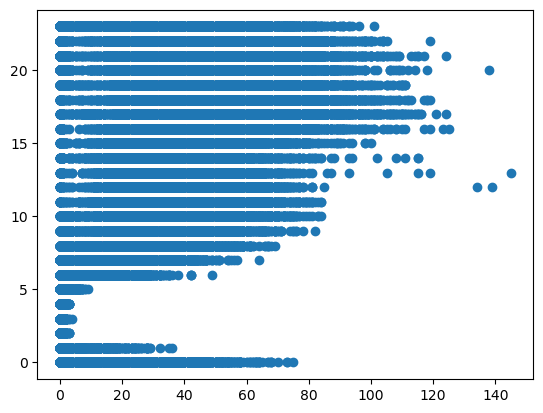

In [8]:
plt.scatter(df.number_people, df.hour)

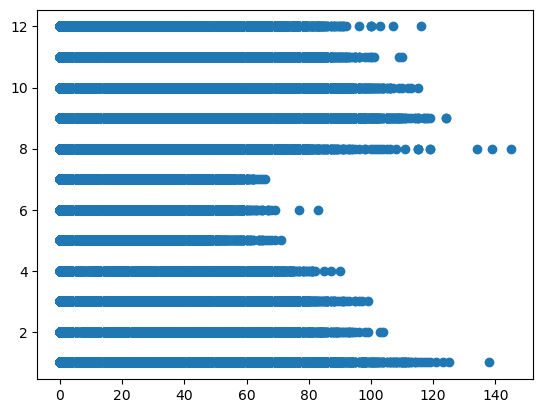

In [9]:
plt.scatter(df.number_people, df.month)

C:\Users\SOUVIK\AppData\Local\Temp\ipykernel_23300\1494031867.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  F = g.groupby(['hour','day_of_week'], as_index = False).number_people.mean().pivot('day_of_week','hour', 'number_people').fillna(0)


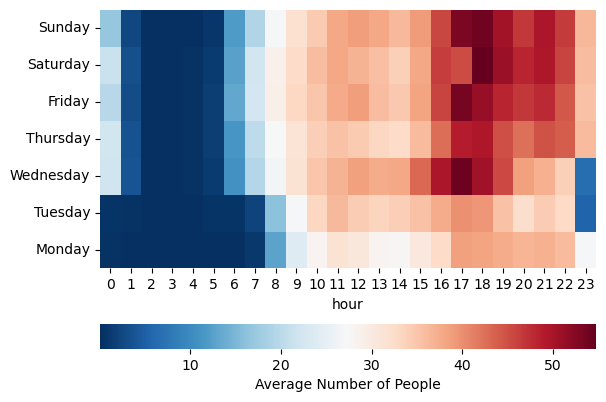

In [10]:
#analyze time in hours instead of seconds

g = df[['hour','number_people','day_of_week']]

#Group by tme and day
F = g.groupby(['hour','day_of_week'], as_index = False).number_people.mean().pivot('day_of_week','hour', 'number_people').fillna(0)


grid_kws = {"height_ratios": (.9, .05), "hspace": .3}

dow= 'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split()
dow.reverse()

ax = sns.heatmap(F, cmap='RdBu_r',cbar_kws={"orientation": "horizontal"})
ax.set_yticklabels(dow, rotation = 0)
ax.set_ylabel('')
ax.set_xlabel('hour')

cbar = ax.collections[0].colorbar
cbar.set_label('Average Number of People')

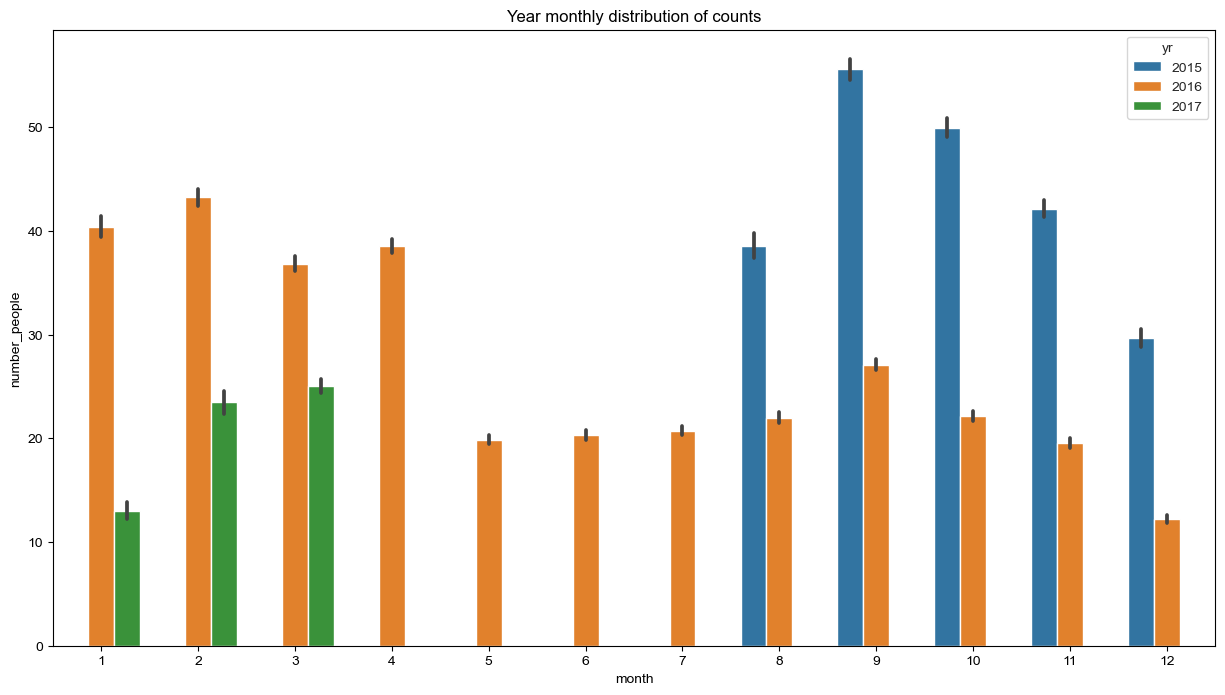

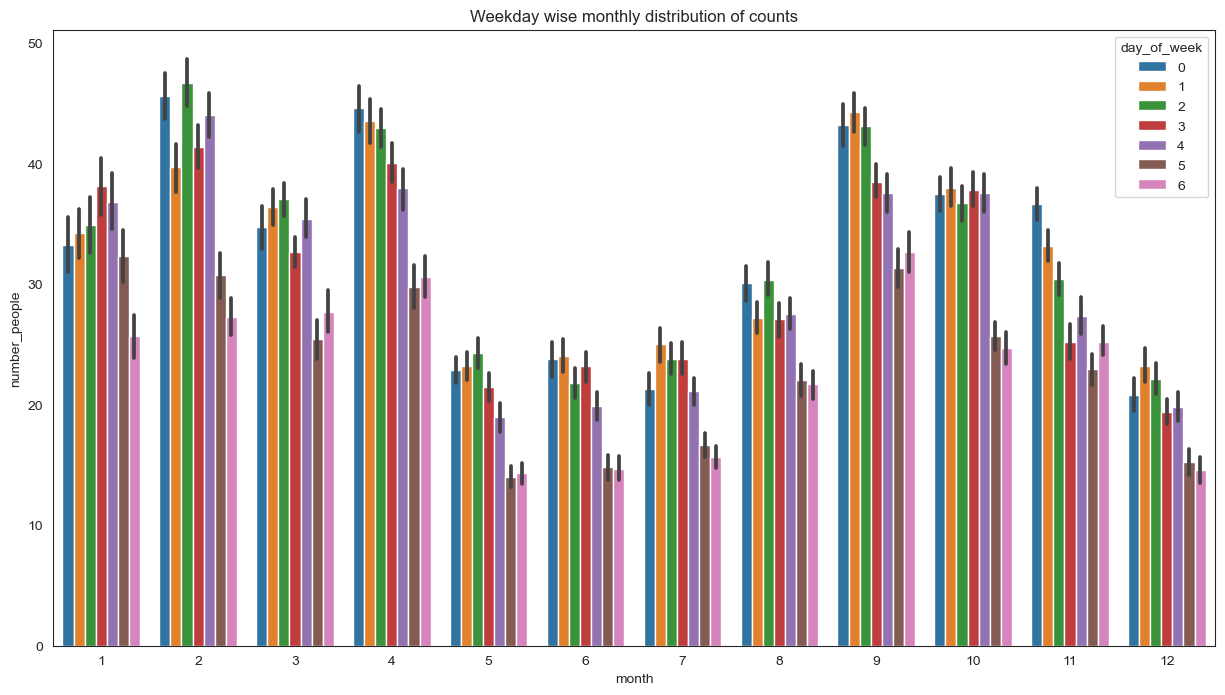

In [11]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='number_people',data=df[['month','number_people','yr']],hue='yr',ax=ax)
ax.set_title('Year monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='number_people',data=df[['month','number_people','day_of_week']],hue='day_of_week',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

Data from 2015 Aug to 2017 Mar

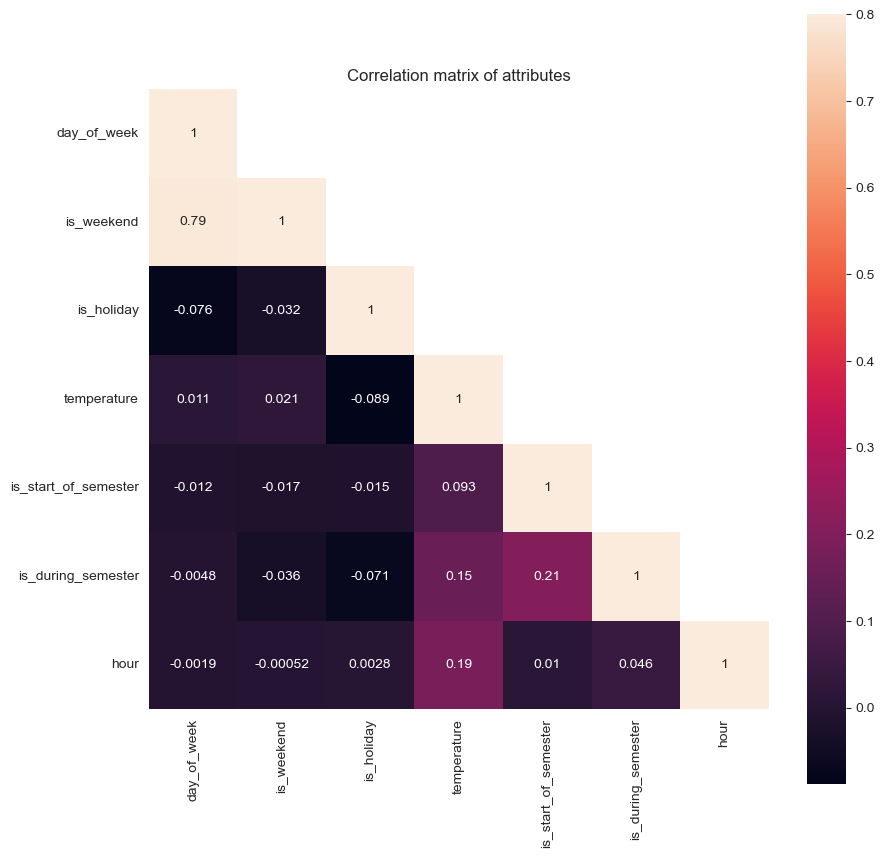

In [12]:
correMtr=df[['day_of_week','is_weekend','is_holiday','temperature','is_start_of_semester','is_during_semester','hour']].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
flg,ax=plt.subplots(figsize=(10,10))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True)
ax.set_title('Correlation matrix of attributes')
plt.show()

is_weekend and day_of_week are highly correlated, is_weekend can be dropped

In [13]:
df=df.drop("is_weekend", axis='columns')
df.head()

,number_people,yr,day_of_week,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015,4,0,71.76,0,0,8,17
1,45,2015,4,0,71.76,0,0,8,17
2,40,2015,4,0,71.76,0,0,8,17
3,44,2015,4,0,71.76,0,0,8,17
4,45,2015,4,0,71.76,0,0,8,17


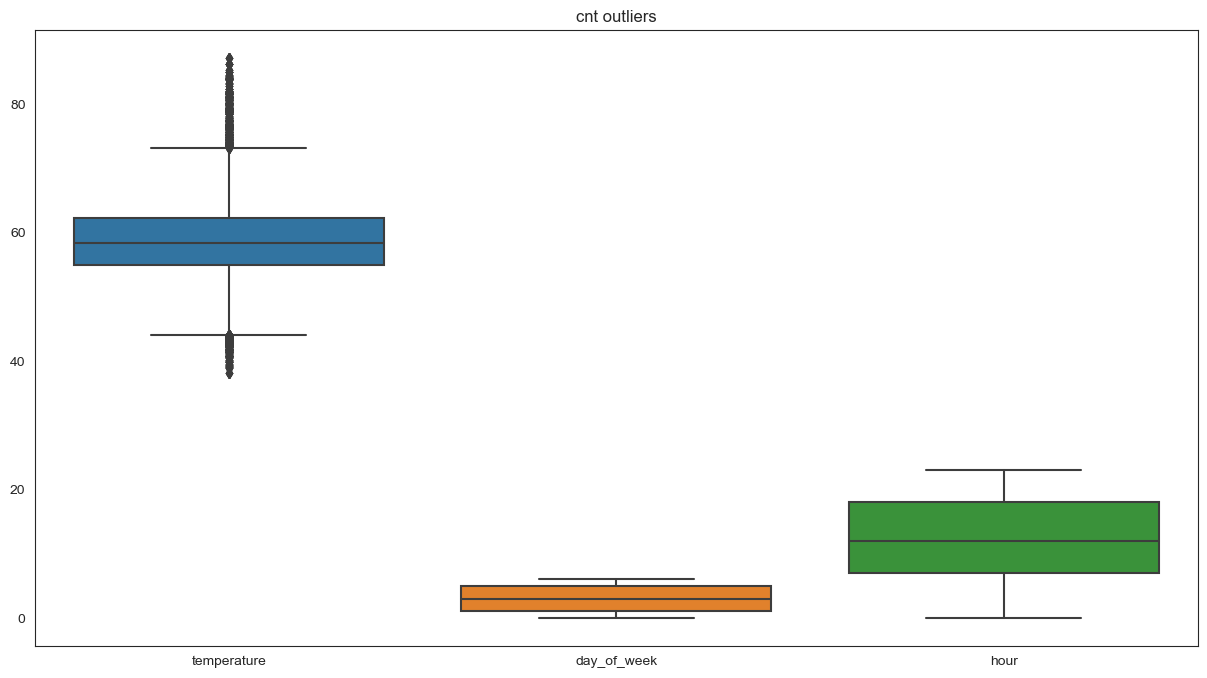

In [14]:
flg,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df[['temperature','day_of_week','hour']])
ax.set_title('cnt outliers')
plt.show()

temperature looks skewed

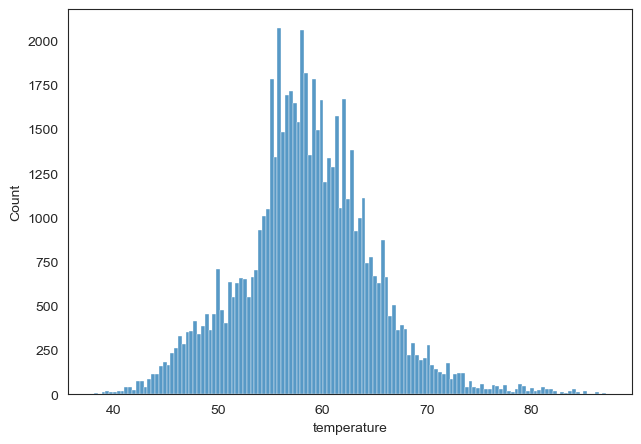

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['temperature'])

plt.show()

In [16]:
df.describe()

,number_people,day_of_week,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,2.982504,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,1.996825,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,1.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,3.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,5.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,6.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [17]:
df.iloc[:,0:1]

,number_people
0,37
1,45
2,40
3,44
4,45
...,...
62179,23
62180,21
62181,25
62182,18


In [18]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0:1],test_size=0.2, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(49747, 9) (12437, 9) (49747, 2) (12437, 2)
   index  number_people
0  35235             39
1  21476             30
2  24103             34
3  23300             41
4  43598             22
   index  number_people
0  44802              1
1  51279             27
2  36816             26
3   2503             71
4  53035              0


In [19]:
#Create a new dataset for train attributes
train_attributes=X_train[['day_of_week','hour','is_holiday','is_start_of_semester','is_during_semester','temperature','month']]
#Create a new dataset for test attributes
test_attributes=X_test[['day_of_week','hour','is_holiday','is_start_of_semester','is_during_semester','temperature','month']]
#categorical attributes
cat_attributes=['day_of_week','hour','is_holiday','is_start_of_semester','is_during_semester','month']
#numerical attributes
num_attributes=['temperature']

In [20]:
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (49747, 50)


,temperature,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,hour_0,hour_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,61.39,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,55.51,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,69.45,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,58.78,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,56.70,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
X_train=train_encoded_attributes
y_train=y_train.number_people.values
X_test=test_encoded_attributes
y_test=y_test.number_people.values

In [22]:
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train,y_train)
lr=lr_model.score(X_test,y_test)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.6267248745591325
Model coefficients : [ 5.67587578e-01 -1.49721194e+12 -1.49721194e+12 -1.49721194e+12
 -1.49721194e+12 -1.49721194e+12 -1.49721194e+12 -1.49721194e+12
  1.59641570e+11  1.59641570e+11  1.59641570e+11  1.59641570e+11
  1.59641570e+11  1.59641570e+11  1.59641570e+11  1.59641570e+11
  1.59641570e+11  1.59641570e+11  1.59641570e+11  1.59641570e+11
  1.59641570e+11  1.59641570e+11  1.59641570e+11  1.59641570e+11
  1.59641570e+11  1.59641570e+11  1.59641570e+11  1.59641570e+11
  1.59641570e+11  1.59641570e+11  1.59641570e+11  1.59641570e+11
  2.73304265e+10  2.73304265e+10 -2.82872613e+11 -2.82872613e+11
  4.57477083e+11  4.57477083e+11 -9.07489117e+11 -9.07489117e+11
 -9.07489117e+11 -9.07489117e+11 -9.07489117e+11 -9.07489117e+11
 -9.07489117e+11 -9.07489117e+11 -9.07489117e+11 -9.07489117e+11
 -9.07489117e+11 -9.07489117e+11]
Model intercept value : 2043124590455.3599


In [23]:
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([41.90209961, 45.83654785, 47.03594971, ..., 18.35388184,
       51.37854004,  8.9855957 ])

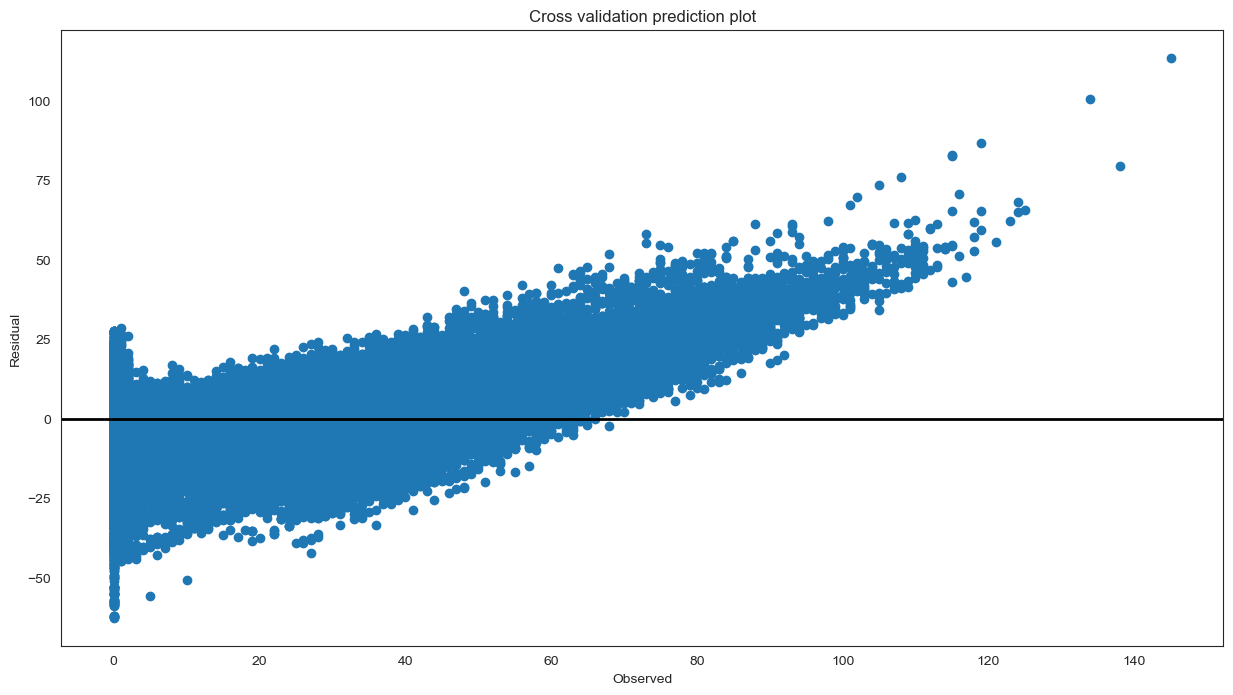

In [24]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()



















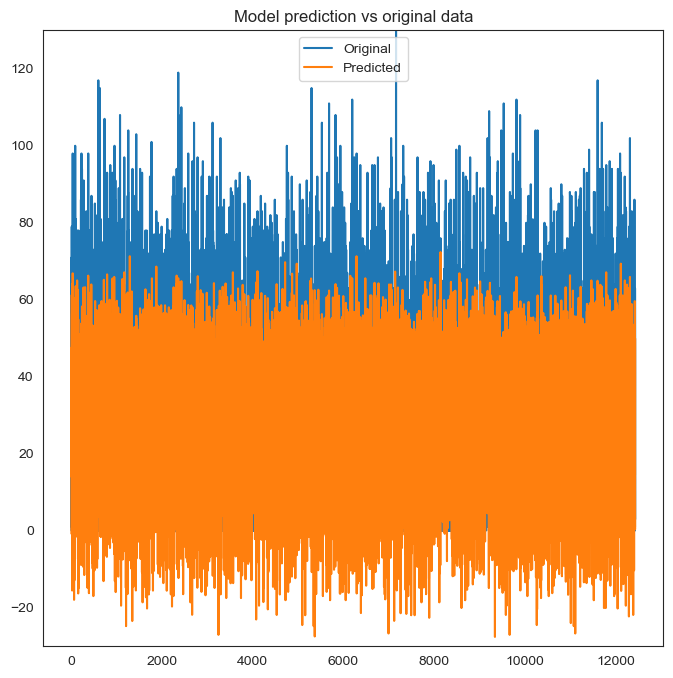

In [25]:
y_pred=lr_model.predict(X_test)
plt.figure(figsize=(8,8))
plt.plot(range(len(y_test)), y_test, label='Original')
plt.plot(range(len(y_test)), y_pred, label='Predicted')
plt.ylim(-30, 130)
plt.legend()
plt.title('Model prediction vs original data')
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly, y_train)
X_test_poly=poly_reg.fit_transform(X_test)
plr=lin_reg_2.score(X_test_poly,y_test)
print('Accuracy of the model :',plr)

Accuracy of the model : 0.7284742726603701
